In [1]:
import pandas as pd
import numpy as np

In [7]:
# To load the dataset
df = pd.read_csv('/content/data.csv.zip',encoding='latin-1')

In [11]:
# To view first 5 row

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
#Dataset Structure

df.shape

(541909, 8)

There are 541909 rows and 8 columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From above it is clear that most of the row data are object whereas quantity is integer value no decimal no fraction just a number.

In [13]:
df.describe(include= "all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


**InvoiceNo**	: There are 541,909 invoices total.

**StockCode** :  There are 4,070 unique products.

**Description	Product names**. There are 4,223 unique descriptions.

**Quantity**	. On average, 9.55 units, but with large variation (std 218.08).

**InvoiceDate**	: Sales happened between 12/01/2010  and 12/09/2011

**UnitPrice**: 	Average product price is £4.61, with a large spread (std 96.76) — meaning some very expensive items exist.

**CustomerID**: 	There are 406,829 valid customer  The average customer ID is around 15287.

***Country***	: Data includes 38 different countries, with United Kingdom being the most common (495,478 transactions).

In [14]:
#check for mising values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


"The dataset has missing values mainly in the Description and CustomerID columns.

Description is missing for 1,454 items

CustomerID is missing for 135,080 entries, which may represent
unregistered customers.

Other columns are complete and contain no missing values."

In [15]:
# Remove rows with missing Description
df = df.dropna(subset=['Description'])

In [17]:
#Filling  missing CustomerID
df['CustomerID'] = df['CustomerID'].fillna(0)

In [18]:
df['CustomerID'].head(10)

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
5,17850.0
6,17850.0
7,17850.0
8,17850.0
9,13047.0


In [20]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
df = pd.read_csv('/content/data.csv.zip',encoding='latin-1', parse_dates=['InvoiceDate'],index_col= "InvoiceDate")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [23]:
type(df.InvoiceDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

In [33]:
#retrieving data of only 2011-12
df.loc["2011-12"]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-12-01 08:12:00,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,4.15,13853.0,United Kingdom
2011-12-01 08:14:00,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,1.25,15197.0,United Kingdom
2011-12-01 08:14:00,C579890,23374,RED SPOT PAPER GIFT BAG,-1,0.82,15197.0,United Kingdom
2011-12-01 08:14:00,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,0.85,15197.0,United Kingdom
2011-12-01 08:18:00,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,25.00,13644.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


In [34]:
df.loc["2011-12"].UnitPrice.mean()

np.float64(5.246450930460333)

The average unit price is around 5.25

In [37]:
print(" Date range is from", df.index.min(), "to", df.index.max())

 Date range is from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [39]:
# To Remove negative or zero quantity/price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [42]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

In [43]:
# Creating  a new 'Sales' column
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [46]:
df.Sales.head()

,Sales
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


In [48]:
monthly_sales = df['Sales'].resample('ME').sum()

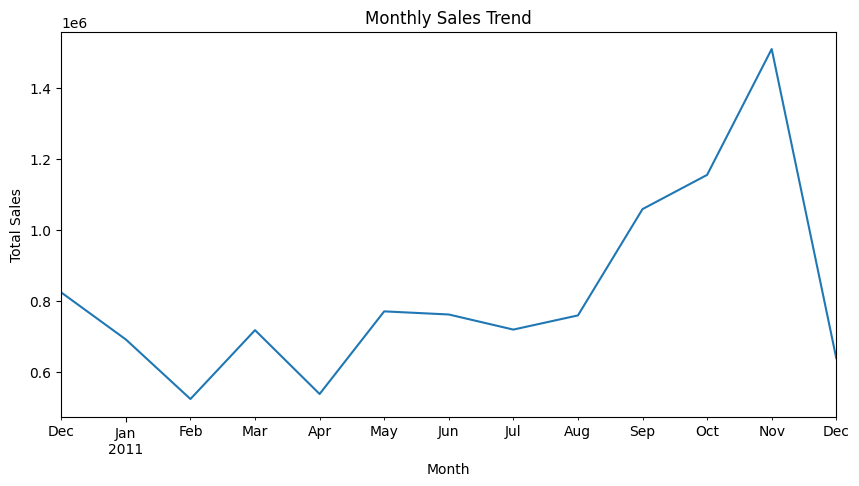

In [56]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

<Axes: xlabel='InvoiceDate'>

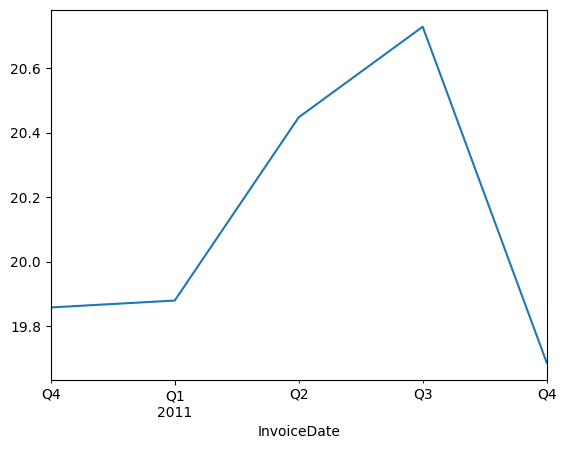

In [52]:
df.Sales.resample('QE').mean().plot()

In [55]:
#Checking  the time coverage
print(f"The dataset covers sales from {df.index.min().date()} to {df.index.max().date()}.")

The dataset covers sales from 2010-12-01 to 2011-12-09.


In [57]:
# Handle Missing Values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
UnitPrice           0
CustomerID     132220
Country             0
Year                0
Month               0
Quarter             0
Sales               0
dtype: int64


In [58]:
 # fill missing popularity with median
df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)

/tmp/ipython-input-2998462636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)


In [59]:
df.CustomerID

,CustomerID
InvoiceDate,
2010-12-01 08:26:00,17850.0
2010-12-01 08:26:00,17850.0
2010-12-01 08:26:00,17850.0
2010-12-01 08:26:00,17850.0
2010-12-01 08:26:00,17850.0
...,...
2011-12-09 12:50:00,12680.0
2011-12-09 12:50:00,12680.0
2011-12-09 12:50:00,12680.0


In [60]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Quarter        0
Sales          0
dtype: int64


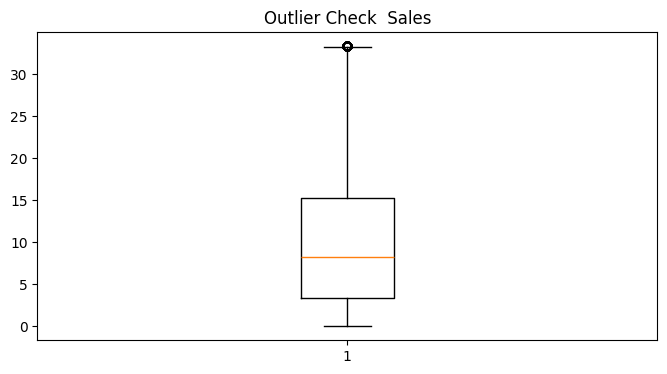

In [92]:
#  Outlier Detection (Basic)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.boxplot(df['Sales'])
plt.title("Outlier Check  Sales")
plt.show()

In [94]:
# To Remove very large outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]

print("\nCleaned data shape:", df.shape)


Cleaned data shape: (479605, 12)


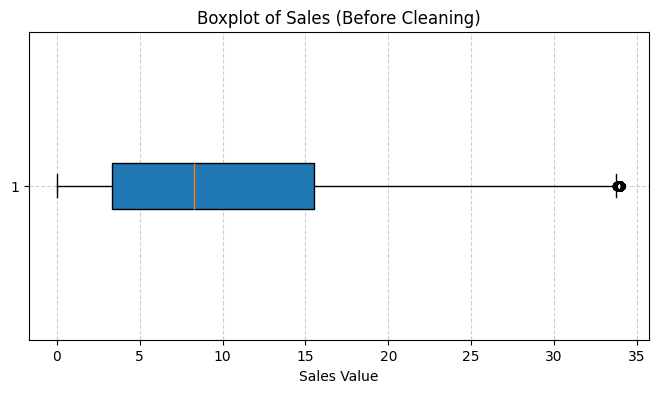

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.boxplot(df['Sales'], vert=False, patch_artist=True)
plt.title("Boxplot of Sales (Before Cleaning)")
plt.xlabel("Sales Value")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [91]:
#From above data it is clear that median(Q2) is 7 Q1 is 4 and  Q3 is 16 (approx),
#minimum value is 0
#and maximum value is around 34

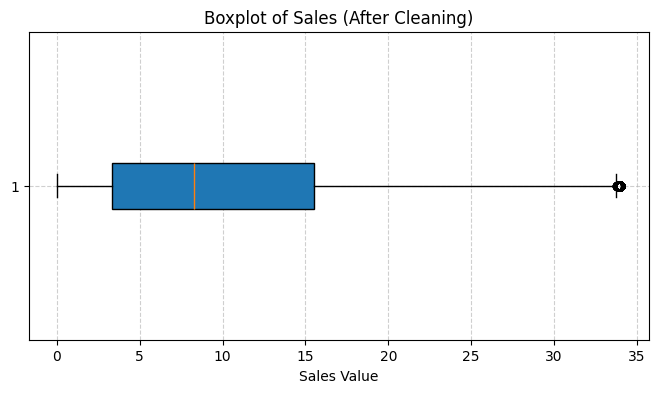

In [66]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Sales'], vert=False, patch_artist=True)
plt.title("Boxplot of Sales (After Cleaning)")
plt.xlabel("Sales Value")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

From above data it is clear that median(Q2) is 4  Q1 is 4 and  Q3 is 16 (approx),
minimum value is 0
and maximum value is around 34

In [74]:
from scipy import stats

# Using Z-score to detect outliers
z_scores = np.abs(stats.zscore(df['Sales']))
threshold = 3
outliers = df[z_scores > threshold]
print(f"\n Detected {len(outliers)} outlier rows in Sales.")




 Detected 0 outlier rows in Sales.


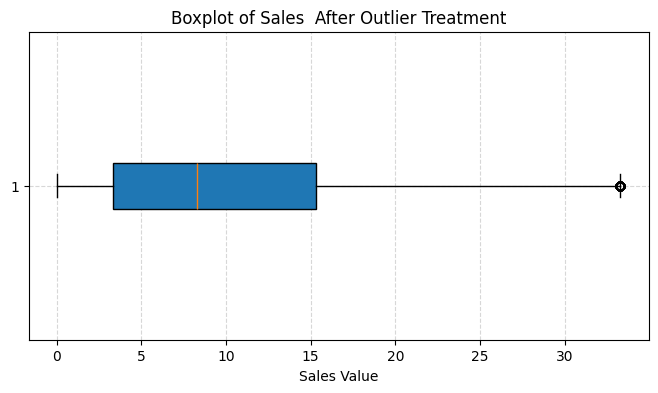


 Dataset shape after outlier removal: (479733, 11)


In [75]:
# Remove extreme outliers
df = df[z_scores <= threshold]

# Boxplot after removing outliers
plt.figure(figsize=(8,4))
plt.boxplot(df['Sales'], vert=False, patch_artist=True)
plt.title("Boxplot of Sales  After Outlier Treatment")
plt.xlabel("Sales Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"\n Dataset shape after outlier removal: {df.shape}")

In [77]:
# Create a revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df[['Quantity','UnitPrice','Revenue']].head()

,Quantity,UnitPrice,Revenue
InvoiceDate,,,
2010-12-01 08:26:00,6,2.55,15.30
2010-12-01 08:26:00,6,3.39,20.34
2010-12-01 08:26:00,8,2.75,22.00
2010-12-01 08:26:00,6,3.39,20.34
2010-12-01 08:26:00,6,3.39,20.34


In [78]:
df['Revenue'].describe()

,Revenue
count,479733.000000
mean,10.072436
std,7.748149
min,0.001000
25%,3.320000
50%,8.260000
75%,15.300000
max,33.300000


In [79]:
# Top 10 products by revenue
product_sales = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
product_sales.head(10)

,Revenue
Description,
JUMBO BAG RED RETROSPOT,22267.55
WHITE HANGING HEART T-LIGHT HOLDER,20815.31
REGENCY CAKESTAND 3 TIER,19740.96
ASSORTED COLOUR BIRD ORNAMENT,18733.54
SET OF 3 CAKE TINS PANTRY DESIGN,18617.26
PARTY BUNTING,18214.65
LUNCH BAG RED RETROSPOT,17863.56
JAM MAKING SET WITH JARS,16309.33
SPOTTY BUNTING,15474.77


In [80]:
# Customer region behavior (example: total revenue by country)
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_sales.head(10)

,Revenue
Country,
United Kingdom,4279139.774
Germany,118799.040
France,111664.280
EIRE,103242.990
Spain,30851.300
Belgium,29426.460
Switzerland,24623.360
Portugal,18370.740
Norway,13023.580


In [82]:
 #Monthly revenue trend

monthly_revenue = df['Revenue'].resample('ME').sum()

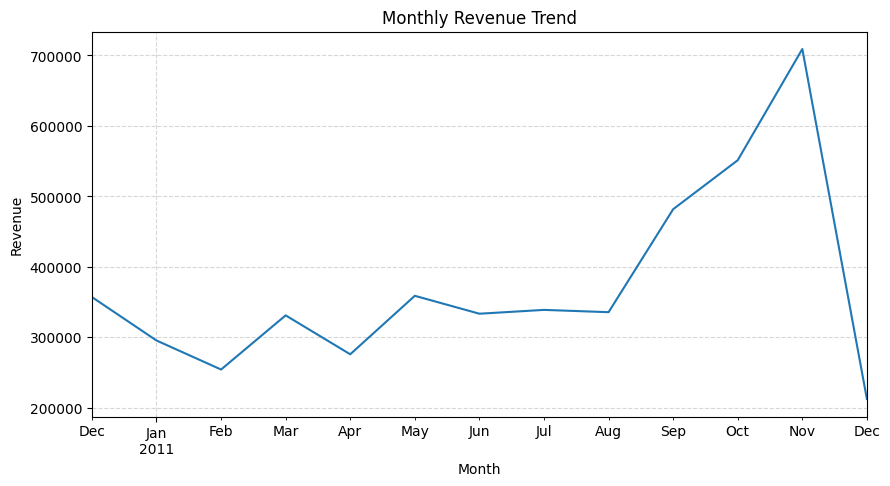

In [83]:
plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From September to November, revenue goes up very fast.
November has the highest sales of the whole year (around 700,000).

After December, sales drop.
Sales keep falling in January and reach the lowest point in February (around 250,000)

From April to August, sales stay between 320,000–360,000.
They don’t go up much, but they also don’t fall.

If we draw the monthly revenue as a line, it looks like a U:

Low at the start (Jan–Mar),Steady in the middle (Apr–Aug),High at the end (Sep–Nov)
This shows the business has strong seasonal behavior.
It repeats every year.

February has the smallest revenue.This month may need(promotions,discounts)

Normally December should be a strong month.
But here, December has very low revenue (around 200,000).

In [84]:
#Top products visualization
top_products = product_sales.head(10)

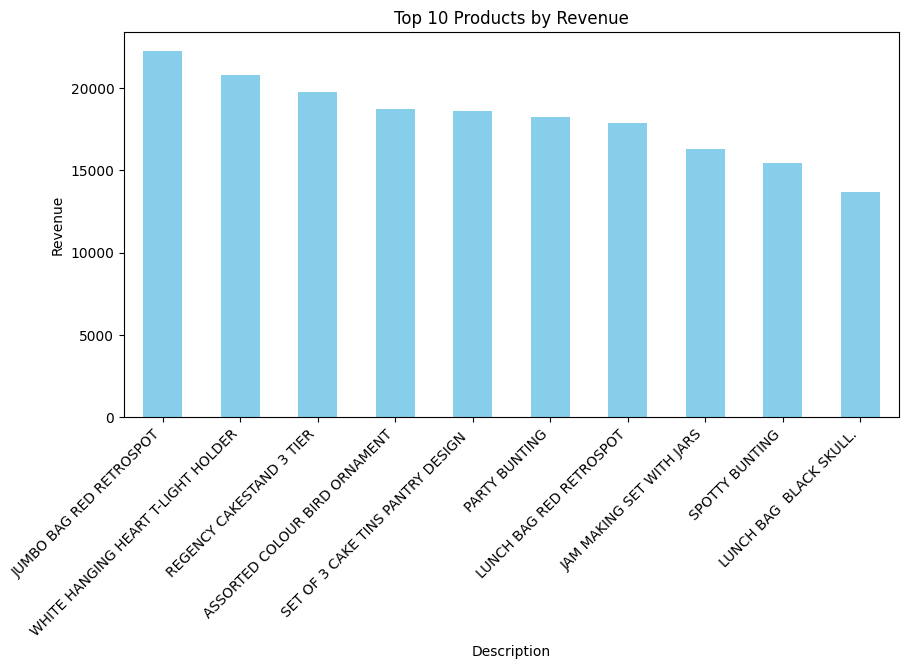

In [85]:
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()


In the above chart, the x-axis represents the product description, while the y-axis represents the total revenue generated by each product.

It is evident that "Jumbo Bag Red Retrospot" stands out as the top-performing product, generating over 200,000 in revenue. This is followed by other high-performing items such as "White Hanging Heart", "Regency Cakes", and several others.

Overall, all the top 10 products have generated more than 10,000 in revenue each, indicating a strong contribution of these key items to the company's total sales performance.

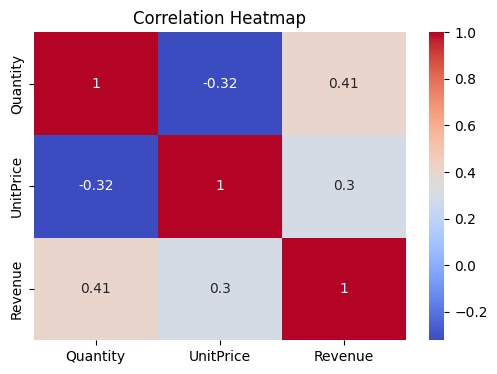

In [87]:
#Correlation heatmap
import seaborn as sns
numeric_cols = ['Quantity','UnitPrice','Revenue']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# *Correlation Heatmap *

This chart shows how three things are related:
Quantity (how many items are sold)
Unit Price (price of each item)
Revenue (total money earned)

**Quantity and Revenue are directly proportional**

When more items are sold, total revenue also goes up.

**Unit Price and Revenue are also directly proportional**

When the price per item increases, sometimes revenue increases, but not as much because higher prices can make people buy fewer items.

**Quantity and Unit Price are inversely proportional**

When the price is low, people buy a lot and when the price is high, people buy less.



This heatmap visualizes the correlation between Quantity, UnitPrice, and Revenue.

**Quantity vs Revenue (0.41)** - Shows a moderate positive correlation(as more items are sold, total revenue generally increases.)

**UnitPrice vs Revenue (0.30)** - A weaker positive correlation.(Higher prices can increase revenue, but it depends on how much quantity decreases.)

**Quantity vs UnitPrice (-0.32)** - A negative correlation. (Products sold in large quantities tend to have lower prices (bulk discounts or cheaper items), while high-priced items often sell in smaller quantities.)


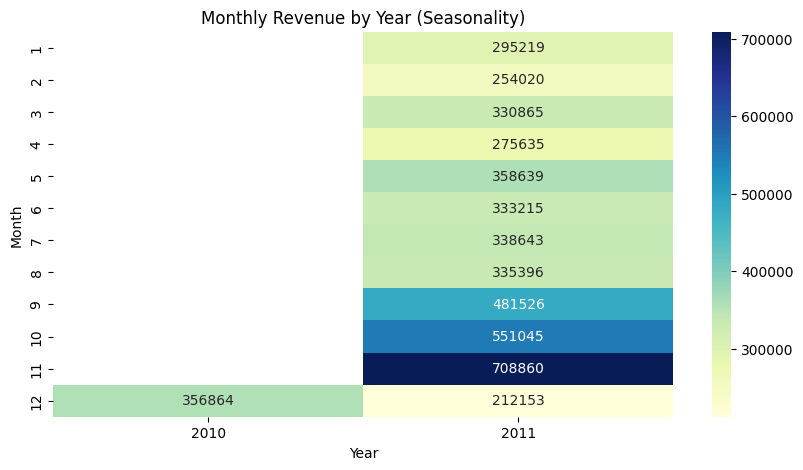

In [88]:
# Seasonality / Monthly Revenue by Year
seasonal = df.pivot_table(values='Revenue', index=df.index.month, columns=df.index.year, aggfunc='sum')

plt.figure(figsize=(10,5))
sns.heatmap(seasonal, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Monthly Revenue by Year (Seasonality)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

**Monthly Revenue by Year (Seasonality Heatmap)**

This heatmap tracks monthly revenue patterns for 2010–2011.

There’s a strong seasonal pattern, with revenue sharply increasing towards October–December.

December 2010 records the highest revenue (~708k), showing strong end of year sales activity (likely due to holiday shopping.)

The first half of the year tends to have more stable but lower revenue levels.

In 2011, early months (Jan–Apr) show lower performance compared to late 2010, suggesting a possible post-holiday slowdown.

Therefore,
The business is highly seasonal, peaking in (especially December). Planning inventory and marketing around this seasonal trend could optimize sales and revenue.


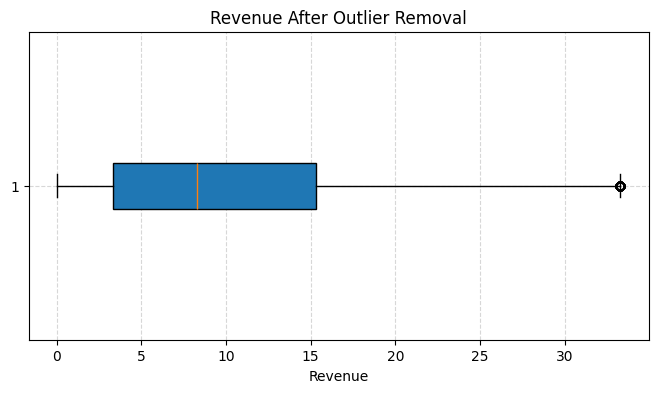

In [89]:
# Z-score method for detecting extreme outliers
z_scores = np.abs(stats.zscore(df['Revenue']))
df_clean = df[z_scores <= 3]

plt.figure(figsize=(8,4))
plt.boxplot(df_clean['Revenue'], vert=False, patch_artist=True)
plt.title("Revenue After Outlier Removal")
plt.xlabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In short,

The data shows that Jumbo Bag Red Retrospot is the best-selling product, earning over 200,000 in revenue. It’s followed by White Hanging Heart and Regency Cakes. All of the top 10 products make more than 10,000, which means a small number of items bring in most of the sales.

From the correlation heatmap, revenue goes up when more items are sold, while higher prices help a bit but not as much. When prices are low, people tend to buy more, which explains the negative link between quantity and price.

Looking at the seasonality chart, sales start to climb in September, peak in November at around 700K, and then drop sharply after December, reaching the lowest point in February (around 250K). From April to August, sales stay stable. Overall, the trend looks like a “U” shape, showing clear seasonal behavior. Focusing discounts in February and boosting marketing in October and November could help balance sales throughout the year.